In [2]:
# To install basic/necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
# ------------------ Import necessary libraries ------------------

import pandas as pd  # Used for handling data structures like DataFrames, reading CSVs, etc.
import numpy as np   # Supports mathematical operations and multi-dimensional arrays

# From scikit-learn (sklearn), we import tools for machine learning
from sklearn.multioutput import MultiOutputRegressor  # Allows a regressor to predict multiple outputs
from sklearn.ensemble import RandomForestRegressor    # A powerful ensemble regressor using decision trees
from sklearn.model_selection import train_test_split  # Splits the dataset into training and testing subsets
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for regression


In [4]:
# load the dataset
df = pd.read_csv('/content/afa2e701598d20110228.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [5]:
df.info() # dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


The df.info() output shows that the dataset has 2,861 rows and 11 columns. Most columns are numeric (float64), except for id (int64) and date (object, likely a string). Several columns have missing values—most notably SO4 and CL with 49 missing entries each. The date column should be converted to datetime format for proper time analysis. Overall, the dataset is small (246 KB) and mostly complete, making it suitable for further analysis after handling missing data.

In [7]:
# rows and cols
df.shape

(2861, 11)

In [9]:
# Statistics of the data
df.describe().T
#The command df.describe().T provides a statistical summary
# of all the numerical columns in the DataFrame, with each column’s
#statistics displayed transposed (T) — meaning rows and columns are
#swapped for better readability.

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [10]:
# Missing values
df.isnull().sum()

,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


Columns like id and date have no missing values.

Columns like SO4 and CL have 49 missing entries each, which is relatively high and may need special handling (e.g., imputation or removal).

This command help to quickly assess data completeness, which is essential before performing any machine learning or statistical analysis.

In [11]:
# Convert the 'date' column from object (string) to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


This  converts the 'date' column from a string format (object) to proper datetime format, making it usable for time-based operations and analysis.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [13]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


This step Ensures that the data is organized consistently for time-series analysis, trend detection, or modeling.

Especially important when using lag features, time-based resampling, or grouping by ID and time.

In [14]:
# Extract the year from the 'date' column and store it in a new column named 'year'
df['year'] = df['date'].dt.year
# Extract the month from the 'date' column and store it in a new column named 'month'
df['month'] = df['date'].dt.month
#show first 5 rows of the dataset
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [15]:
df.columns #returns the list of column names

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [17]:
# defines a list of column names representing key pollutants in the dataset,
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [18]:
# Fill missing values with column means (safer for numeric data)
df[pollutants] = df[pollutants].fillna(df[pollutants].mean())

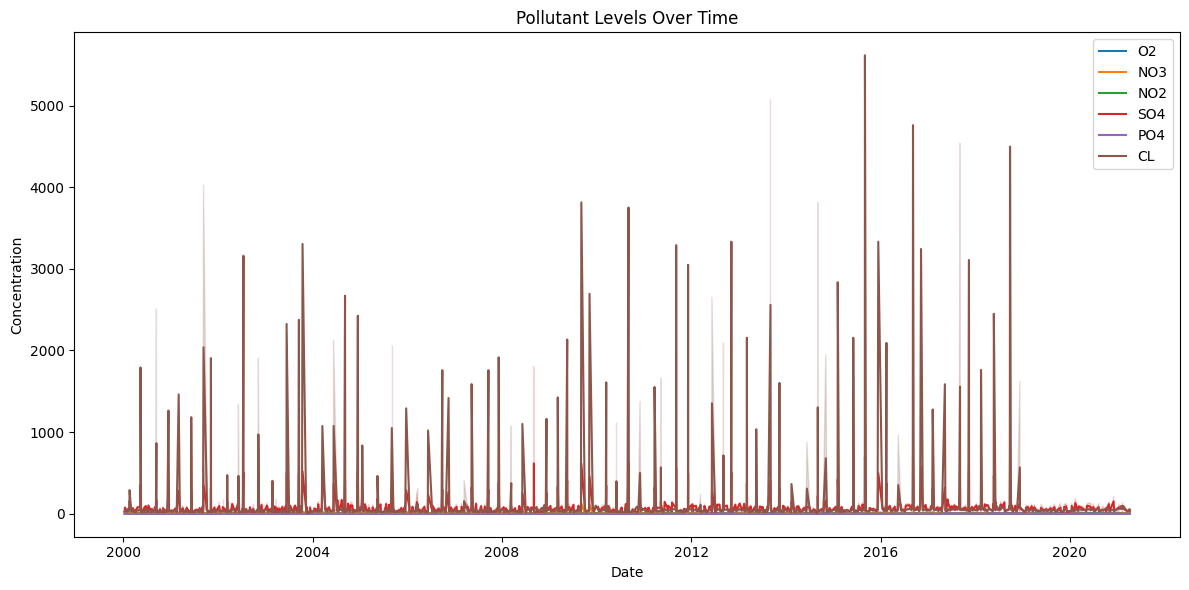

In [19]:
#visualization of pollutants data
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot of pollutant data over time
plt.figure(figsize=(12, 6))
for col in pollutants:
    sns.lineplot(data=df, x='date', y=col, label=col)

plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()
